In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

Consider the function

$$f(x) = f_1(x) + f_2(x)$$

where $f_1(x) = (x − 1)^2$ and $f_2(x) = (x + 1)^2$.

Use the Stochastic Gradient Descent (SGD) method to find the minimum of $f(x)$ each iteration of the SGD is given by
$$ x_{k+1} = x_k − η_k∇f_{i(k)}(x_k) $$
where $i(k) ∈ {1,2}$ is drawn uniformly.

Initialize the method with a random initial condition x0 and perform 5000 iterations; consider the following two choices for ηk:

- $η_k = η = 10^{−3}$;
- $η_k = \frac{1}{(10+k)}$.


Minimum of function f is y = 2.0, found in x = 0.0
Minimum of function f1 is 0.0, found in 1.0
Minimum of function f2 is 0.0, found in -1.0


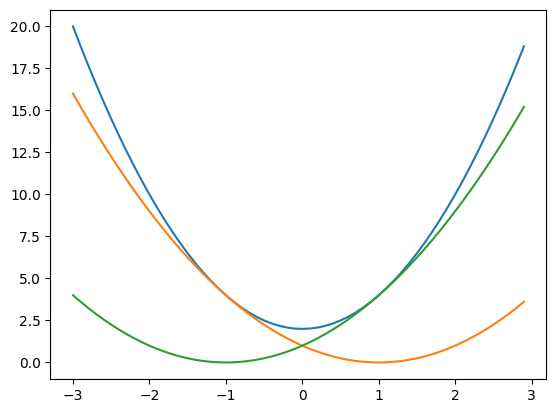

In [2]:
f1 = lambda x: (x - 1) ** 2
f2 = lambda x: (x + 1) ** 2
f = lambda x: f1(x) + f2(x)

df1 = jax.jit(jax.grad(f1))
df2 = jax.jit(jax.grad(f2))

dfs = [df1, df2]

x = np.arange(-3, 3, 0.1)
y1 = f1(x)
y2 = f2(x)
y = f(x)

min_f = (x[np.argmin(y)], min(y))

print("Minimum of function f is y = %1.1f, found in x = %1.1f" % (min_f[1], min_f[0]))
print("Minimum of function f1 is %1.1f, found in %1.1f" % (min(y1), x[np.argmin(y1)]))
print("Minimum of function f2 is %1.1f, found in %1.1f" % (min(y2), x[np.argmin(y2)]))

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

Find minumum with the SGD method.


Constant step-size:

2023-06-11 14:44:49.394001: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


0.008885798


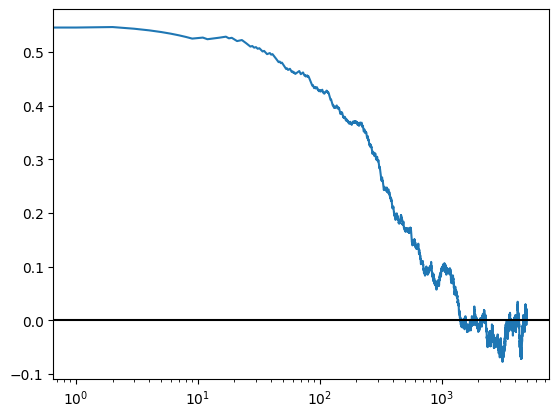

In [3]:
np.random.seed(0)
x_guess = np.random.rand()

max_iter = 5000
step_size = 1.0e-3


def residual(x_guess):
    return jnp.linalg.norm(f(x_guess) - min_f[1])


def difference(x, x_next):
    return jnp.linalg.norm(f(x) - f(x_next))


res = jax.jit(residual)
diff = jax.jit(difference)

const_res_history = list()
diff_history = list()
const_x_history = list()

const_res_history.append(res(x_guess))
const_x_history.append(x_guess)

x_copy = x_guess
for i in range(max_iter):
    grad = dfs[np.random.randint(0, 2)](x_guess)
    x_guess -= step_size * grad
    # const_res_history.append(res(x_guess))
    # diff_history.append(diff(x_copy, x_guess))
    const_x_history.append(x_guess)
    x_copy = x_guess

print(x_guess)
# plt.semilogx(const_res_history)
# plt.semilogx(diff_history)
plt.semilogx(const_x_history)
plt.axhline(0, color="black")

Dynamic step-size:

In [29]:
np.random.seed(0)
x_guess = np.random.rand()

max_iter = 5000


def residual(x_guess):
    return jnp.linalg.norm(f(x_guess) - min_f[1])


def difference(x, x_next):
    return jnp.linalg.norm(f(x) - f(x_next))


res = jax.jit(residual)
diff = jax.jit(difference)

dyn_res_history = list()
diff_history = list()
dyn_x_history = list()
dyn_res_history.append(res(x_guess))
dyn_x_history.append(x_guess)

x_copy = x_guess
for i in range(max_iter):
    step_size = 1 / (10 + i)
    grad = dfs[np.random.randint(0, 2)](x_guess)
    x_guess -= step_size * grad
    # dyn_res_history.append(res(x_guess))
    # diff_history.append(diff(x_copy, x_guess))
    dyn_x_history.append(x_guess)
    x_copy = x_guess

print(x_guess)

-0.013964191


Plot the convergence history in the two cases.

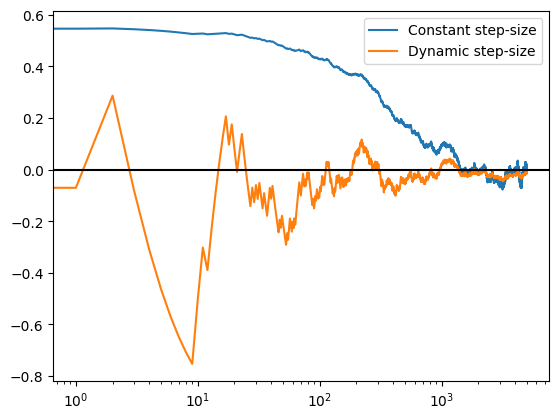

In [28]:
# plt.semilogx(const_res_history, label="Constant step size")
# plt.semilogx(dyn_res_history, label="Dynamic step size")
# can't plot in loglog scale because it also goes below zero
plt.semilogx(const_x_history, label="Constant step-size")
plt.semilogx(dyn_x_history, label="Dynamic step-size")

plt.axhline(0, color="black")

plt.legend()

Find experimentally how the quantity 
$$E(f(x_k)) −f(x^*)$$ 
(where $x^*$ is the point where $f(x)$ attains the minimum) depends on the number of performed iteration. 

Comment the result.

2.188677
2.0607803
2.0228832
2.0363512
2.01682
2.0134287
2.0043695
2.0044627
2.0048082
2.0022125
2.0014074
2.0008788


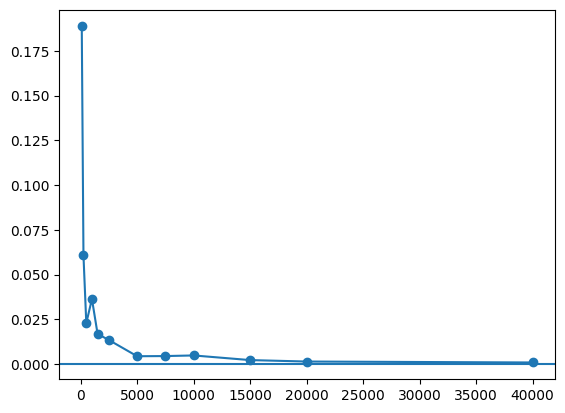

In [24]:
max_iter_list = [
    100,
    250,
    500,
    1000,
    1500,
    2500,
    5000,
    7500,
    10000,
    15000,
    20000,
    40000,
]
# np.random.seed(0)


def residual(x_guess):
    return jnp.linalg.norm(f(x_guess) - min_f[1])


def difference(x, x_next):
    return jnp.linalg.norm(f(x) - f(x_next))


res = jax.jit(residual)
diff = jax.jit(difference)

expected_value_history = list()
# step_size = 1.0e-3

for max_iter in max_iter_list:
    x_guess = np.random.rand()

    dyn_x_history = list()
    dyn_x_history.append(x_guess)

    for i in range(max_iter):
        step_size = 1 / (i + 1)
        grad = dfs[np.random.randint(0, 2)](x_guess)
        x_guess -= step_size * grad
        dyn_x_history.append(x_guess)

    E = jnp.mean(f(np.array(dyn_x_history)))
    print(E)
    expected_value_history.append(E)

diff = expected_value_history - min_f[1]

# plt.semilogx(max_iter_list, expected_value_history, label="Expected values")
plt.plot(max_iter_list, diff, "o-", label="E(f(x_k)) - f(x^*)")
plt.axhline(0)

As we can see, the higher the number of iterations, the better is the approximation of the minimum.

This is due to the dynamic step-size: it starts "big" ($η_0 = 0.1$) and get smaller and smaller as the iterations continue. A big step-size makes the approximation to go past the exact solution, at each iteration: the behaviour is "ondulatory" across the exact solution, and hence the expected value of the history is the exact value.